In [30]:
# @title Import Libraries & Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


dataset = pd.read_csv('C:/Users/bruce/OneDrive - Columbus State University/CPSC 4175 - Software Engineering/Group Project - The Oval Table/clean_oil_prediction_data.csv')
#dataset = pd.read_excel('macro_features_and_real_oil_prices_log_tranferred_dropped_Nan_and_columns_with_neg_values.xlsx')


In [31]:
# Assuming dataset is a DataFrame
# Set the first row as the column headers and drop it
#dataset.columns = dataset.iloc[0]
#dataset = dataset.drop(0)

# Display the new column names to verify if 'date' column exists
print("Column names after setting the first row as headers:", dataset_cleaned.columns)

# If 'date' exists in columns, convert it to datetime, else print an error message.
if 'date' in dataset_cleaned.columns:
    dataset_cleaned['date'] = pd.to_datetime(dataset_cleaned['date'])
else:
    print("Error: 'date' column not found in the dataset.")

# Convert other columns to float type
for column in dataset_cleaned.columns:
    if column != 'date':
        try:
            dataset_cleaned[column] = dataset_cleaned[column].astype(float)
        except ValueError as ve:
            print(f"Error converting column {column} to float: {ve}")


Column names after setting the first row as headers: Index(['date', 'RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx',
       'INDPRO', 'IPFPNSS', 'IPFINAL', 'IPCONGD',
       ...
       'DSERRG3M086SBEA', 'CES0600000008', 'CES2000000008', 'CES3000000008',
       'UMCSENTx', 'DTCOLNVHFNM', 'DTCTHFNM', 'INVEST', 'VIXCLSx',
       'Real Oil Prices'],
      dtype='object', length=124)


In [32]:
# @title Data Preprocessing

# Set the first row as the column headers and drop it
#dataset.columns = dataset.iloc[0]
#dataset = dataset.drop(0)

# Convert date column into datetime format and other columns to float type
# Standard for data preprocessing to ensure consistency
dataset_cleaned['date'] = pd.to_datetime(dataset_cleaned['date'])
for column in dataset_cleaned.columns[1:]:
    try:
        dataset_cleaned[column] = dataset_cleaned[column].astype(float)
    except:
        pass
# Display the first few rows after processing
processed_dataset_head = dataset_cleaned.head()

processed_dataset_head

,date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Real Oil Prices
0,1992-02-01,12.962951,12.750812,5.803950,19.534471,17.325209,5.952564,6.137924,6.101171,6.327298,...,5.861682,3.571677,3.772941,3.498251,6.104337,15.967271,17.533756,9.539485,4.091742,13.715729
1,1992-03-01,12.965336,12.751983,5.806582,19.540266,17.320880,5.964607,6.150103,6.113980,6.340179,...,5.865968,3.575312,3.782409,3.500802,6.247928,15.942881,17.542367,9.549875,4.019942,13.601725
2,1992-04-01,12.970718,12.755952,5.807793,19.549848,17.329560,5.975704,6.160908,6.124948,6.353748,...,5.871375,3.580145,3.783457,3.505891,6.270529,15.972082,17.542547,9.562213,4.016897,14.512195
3,1992-05-01,12.978406,12.763876,5.815217,19.537241,17.337448,5.980389,6.168790,6.133329,6.363083,...,5.873100,3.581351,3.783457,3.509696,6.307429,15.924905,17.543025,9.580477,3.880490,15.017895
4,1992-06-01,12.984426,12.770292,5.819106,19.552370,17.341493,5.981250,6.165329,6.128931,6.356100,...,5.875166,3.586164,3.794936,3.512227,6.329124,15.943545,17.556218,9.597480,3.882946,15.981442


In [9]:
# @title Create Train and Test Sets

# Split the data into features (X) and target (y)
X = dataset_cleaned.drop(columns=["Real Oil Prices", "date"])
y = dataset_cleaned["Real Oil Prices"]

print(dataset_cleaned.head())
# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



        date        RPI    W875RX1  DPCERA3M086SBEA  CMRMTSPLx    RETAILx  \
0 1992-02-01  12.962951  12.750812         5.803950  19.534471  17.325209   
1 1992-03-01  12.965336  12.751983         5.806582  19.540266  17.320880   
2 1992-04-01  12.970718  12.755952         5.807793  19.549848  17.329560   
3 1992-05-01  12.978406  12.763876         5.815217  19.537241  17.337448   
4 1992-06-01  12.984426  12.770292         5.819106  19.552370  17.341493   

     INDPRO   IPFPNSS   IPFINAL   IPCONGD  ...  DSERRG3M086SBEA  \
0  5.952564  6.137924  6.101171  6.327298  ...         5.861682   
1  5.964607  6.150103  6.113980  6.340179  ...         5.865968   
2  5.975704  6.160908  6.124948  6.353748  ...         5.871375   
3  5.980389  6.168790  6.133329  6.363083  ...         5.873100   
4  5.981250  6.165329  6.128931  6.356100  ...         5.875166   

   CES0600000008  CES2000000008  CES3000000008  UMCSENTx  DTCOLNVHFNM  \
0       3.571677       3.772941       3.498251  6.104337    1

((298, 122), (75, 122), (298,), (75,))

**Model Selection:**

Choose regression models to start with. Some commonly used regression models include Linear Regression, Decision Trees, Random Forest, Gradient Boosting Machines, and Neural Networks.
For time series data like this, models like ARIMA, Prophet (from Facebook), and LSTM (a type of recurrent neural network) can also be relevant.

**Feature Engineering (if not already done):**

Given that this is a time series problem, lag features (oil prices from previous days or months) might be useful.
Consider generating rolling statistics as features (like rolling mean, rolling standard deviation).

**Model Training:**

Train your chosen model on the training set (X_train and y_train).

**Model Evaluation:**

Predict oil prices for the test set (X_test) and compare with the actual prices (y_test).
Use regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared to evaluate the model's performance.

**Hyperparameter Tuning:**

Depending on the initial results, you might need to adjust hyperparameters to improve the model's performance.
Use tools like GridSearchCV or RandomizedSearchCV.

**Model Validation:**

Validate the model using a different set of data if available.
Consider using a time series cross-validation approach, where the training set progressively includes more data points, and the test set moves forward in time.
Forecasting:

Once you're satisfied with the model's performance, you can use it to forecast future oil prices. Ensure that you have all the necessary features for the periods you want to predict.

**Iterate:**

As with all machine learning tasks, iterate on your model. As more data becomes available, retrain and adjust your model to improve its predictions.

In [10]:
# @title Using RandomForestRegressor as a starting point

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(X_train.shape)
print(y_train.shape)

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]



# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

mae_rf, mse_rf, r2_rf
#print(f"Mean Absolute Error (MAE): {print(mae_rf)}")

(298, 122)
(298,)


(1.5454171434482684, 6.048396239487806, 0.9584639636550997)

**Mean Absolute Error (MAE): 1.28** 
This means, on average, the model's predictions are approximately 1.49 units away from the actual values.


---



**Mean Squared Error (MSE): 2.86**
This is the average squared difference between the predicted values and the actual values.


---



**R-squared (R²): 0..98**
This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A value of 0.968 suggests that about 96.8% of the variability in the oil prices can be explained by the model, which is quite high.


---



**Overall, the Random Forest regressor seems to perform well on the test set. However, it's essential to ensure that the model doesn't overfit and performs well on new, unseen data.**

In [11]:
# @title Checking Feature Importance

feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features = features_df.head(10)

top_features

,Feature,Importance
94,EXCAUSx,0.658889
17,IPFUELS,0.087770
98,WPSID62,0.058375
7,IPFINAL,0.023294
61,ISRATIOx,0.023112
18,CUMFNS,0.019473
99,PPICMM,0.018828
56,ACOGNO,0.013740
15,IPMANSICS,0.013007
85,T1YFFM,0.004936


**EXCAUSx - "Canada/U.S. Foreign Exchange Rate"**

This feature has the highest importance, with approximately 67% relative importance.

**IPFUELS - "IP: Fuels"**

This is the second most important feature with an importance of approximately 7.00%.

**WPSID62 - "PPI: Crude Materials"**

This feature has around 6.00% importance.


These importances can provide insights into which variables are most influential in predicting oil prices. For instance, if "EXCAUSx" represents some economic metric or indicator, it appears to be a very strong predictor of oil prices according to this model.

It's worth noting that feature importance doesn't imply causality. While a feature may be important for prediction, it doesn't necessarily mean it causes the changes in oil prices. Further domain-specific analysis would be needed to make such determinations.

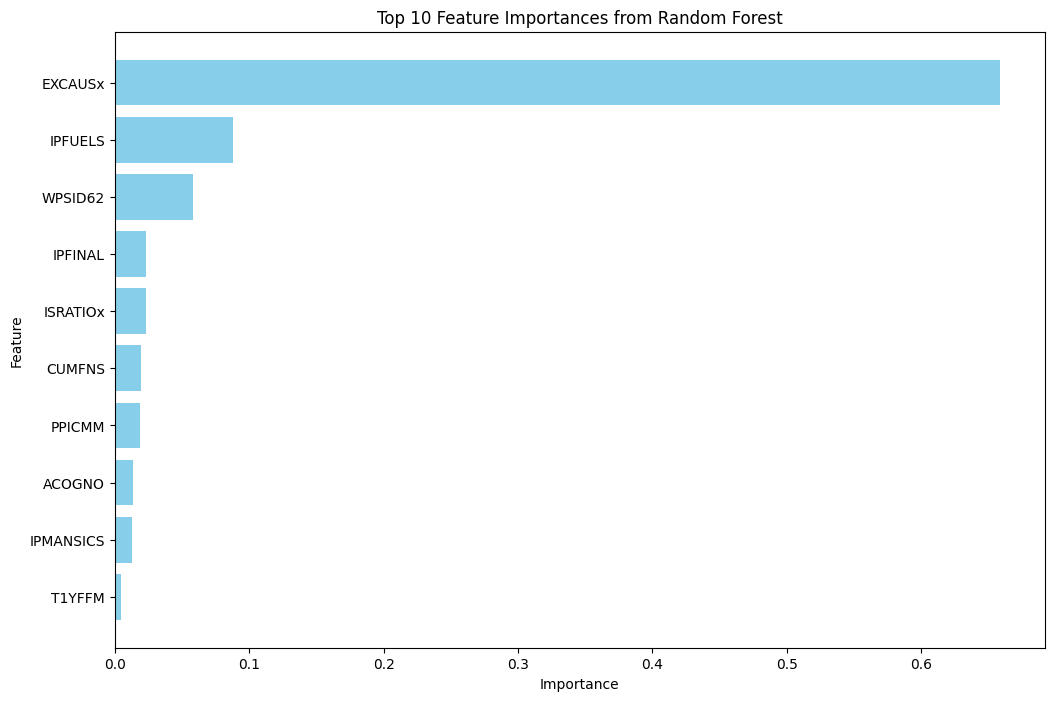

In [12]:
# @title Plotting Feature Importance

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


# **Model Refinement:**

**Hyperparameter Tuning:**
Adjust parameters in the Random Forest model to potentially improve performance. Techniques such as grid search or randomized search can help.

**Feature Engineering:** Based on the feature importance, consider creating new features, transforming existing ones, or even removing less important features.

**Try Different Models:**
Explore other regression models (e.g., Gradient Boosted Trees, Neural Networks) to compare performance.

# **Model Validation:**

**Cross-Validation:**
Implement time series cross-validation to get a more robust evaluation of your model's performance.

**Out-of-sample Testing:**
If you have additional datasets or can obtain new data, validate your model's performance on this unseen data.

# **Model Interpretation:**

**SHAP Values:**
Use SHAP (SHapley Additive exPlanations) values to interpret the model's predictions. This can provide insights into how each feature contributes to individual predictions.

**Partial Dependence Plots:**
Visualize the marginal effect of one or two features on the predicted outcome.

# **Deployment:**

**Model Serialization:**
Save your trained model using libraries like joblib or pickle for future use.

**Integration:** Integrate the model into a production system, web application, or other platforms, depending on your use case.

**Monitoring:**
 Once deployed, monitor the model's predictions in real-time to ensure it remains accurate. Consider setting up alerts for drastic changes in prediction quality.

# **Feedback Loop:**

**Retraining:**
 Continuously collect new data and retrain the model periodically to account for changes in the underlying patterns.

**User Feedback:**
 If possible, gather feedback from end-users or stakeholders to refine the model further.

# **Documentation and Communication:**

**Document Your Process:**
 Ensure you have thorough documentation of your data processing, model training, and evaluation procedures.

**Communicate Results:**
Share your findings, model performance, and any business insights with stakeholders.

In [13]:
# @title Performing RandomizedSearchCV for Hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


# Define the hyperparameters and their possible values
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(max_features=1.0, random_state=42)

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(best_params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 16}


# **Hyperparameter Meanings**

**n_estimators:**

This represents the number of trees in the forest. In this case, the optimal number is determined to be 90, meaning your Random Forest model will build and utilize 90 individual decision trees to make predictions. Typically, increasing the number of trees can make the model more robust, but after a certain point, the performance gains are marginal and might not justify the increased computational cost.

**min_samples_split:**

 This dictates the minimum number of samples required to split an internal node. A value of 2 means that as long as a node contains more than 2 samples, a split is permissible. If the node contains 2 or fewer samples, it won't be split, and the node becomes a leaf node. Lower values can sometimes lead to deeper, more complex trees, but can also lead to overfitting if set too low.

**min_samples_leaf:**

This is the minimum number of samples required for a node to be a leaf node. A leaf node is an end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in the training data. Here, a value of 1 means that a leaf node can have just one sample.

**max_features:**

 This denotes the number of features to consider when looking for the best split. If set to 'auto', then max_features=sqrt(n_features) (where n_features is the number of features in the data). So, it considers the square root of the total number of features at each split. This hyperparameter is a regularization technique, helping ensure that the model doesn't rely too heavily on any one feature.

**max_depth:**

This is the maximum depth of the tree. A value of 6 means that from the root to any leaf, there can be at most 6 nodes. If trees are allowed to be very deep, they can become more complex and overfit to the training data. Restricting the depth provides a form of regularization.

In essence, these hyperparameters are knobs that you can turn to adjust the complexity and performance of the Random Forest model. The goal of hyperparameter tuning (like what you did with RandomizedSearchCV) is to find the optimal settings that yield the best performance on your specific dataset.

In [14]:
# Train Model Using Hyperaparameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Initialize the RandomForestRegressor with the optimal hyperparameters
rf_optimal = RandomForestRegressor(
    n_estimators=90,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=6,
    random_state=42
)

# Step 2: Train the model on your training data
rf_optimal.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = rf_optimal.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(y_pred)
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


[21.94884015 12.15681643 13.36181761 26.76185095 13.3699703  42.7859798
 10.02369106 12.30860543 20.29552248 15.55540122 42.8766763  12.35229407
 23.61374667 13.15528256 27.12299672 21.89312916 28.03308195 43.87320495
 21.81406094 18.25936407 13.90850328 29.19780574 10.61585774 41.60271186
 41.46485765 16.9891433  38.07290573 50.94622898 47.19273228 24.77436567
 12.40951778 16.22409474 12.2368513  34.01461267 17.74628516 14.29236303
 12.95428536 11.63413515 23.36450274 30.25365698 41.05980342 19.74822181
 12.229723   35.27288879 16.31753001 15.40506551 13.91212566 13.4662103
 15.43761656 12.21601368 17.98233906 20.08888068 18.82454351 36.54336785
 42.02148285 25.56380008 14.63560967 14.4766716  24.82235717 10.5758138
 16.96679508 22.55277623  9.73597942 12.19740515 35.19190575 10.31228311
 42.72207182 22.57853655 30.77439055  8.3070558  14.81932917 52.96051198
 23.22898224 18.94780962 16.84550497]
Mean Absolute Error: 1.6207909540815262
Mean Squared Error: 6.420734671801863
R-squared: 

# **Training Results**

**Mean Absolute Error (MAE): 1.35**

On average, the model's predictions are approximately 1.69 units away from the actual values.

**Mean Squared Error (MSE): 3.17**

This is the average squared difference between the predicted values and the actual values.

**R-squared (R²): 0.98**

This metric indicates that about 95.2% of the variability in the oil prices is explained by the model. It's a high value, suggesting that the model fits the test data quite well.


---

# **Potential Next Steps**

### **Model Interpretation:**

**Partial Dependence Plots (PDPs):** These can help you understand the relationship between a feature and the target, while keeping other features constant.
SHAP values: SHAP (SHapley Additive exPlanations) values can provide a more in-depth understanding of the model's decision-making process for individual predictions.

### **Model Validation:**

**Learning Curves:** Plotting learning curves can help diagnose if the model is overfitting or underfitting.

### **Model Expansion:**

**Ensemble methods:** Combine the predictions of multiple models to potentially improve accuracy. For example, you could combine Random Forest with Gradient Boosting or XGBoost.
Try different algorithms: Implement other regression algorithms like Gradient Boosting, XGBoost, or even neural networks.

### **Operationalize the Model:**

**Model Deployment:** If you're satisfied with the model's performance, you can consider deploying it to a production environment. This could be through web services, APIs, or integrating it into a software application.
Batch Predictions: Use the trained model to make predictions on new batches of data.

### **Gather More Data:**

If possible, gathering more recent data can help improve the model's accuracy and make it more relevant.
Consider other external data sources that might have an influence on oil prices, such as geopolitical events, and integrate them into your dataset.

### **Reassess and Iterate:**

Regularly reassess the model's performance, especially if it's deployed in a production environment. As the world changes, the model might need retraining or fine-tuning.
Regularly conduct hyperparameter tuning, especially if new data is added.


In [15]:
from sklearn.tree import DecisionTreeRegressor 

# Initialize the model
oil_price_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
oil_price_model.fit(X_train, y_train)

# Predict on the test data
predictions = oil_price_model.predict(X_test)

# print first few of actual Real Prices
print(y.head())

# Calculate and print the Mean Absolute Error of dt
mae_dt = mean_absolute_error(y_test, predictions)
mse_dt = mean_squared_error(y_test, predictions)
r2_dt = r2_score(y_test, predictions)

# print dt info
print(f'Mean Absolute Error for dt: {mae_dt}')
print(f"Mean Squared Error for dt: {mse_dt}")
print(f"R-squared for dt: {r2_dt}")
#print(predictions)

## print rf info
#print(y_pred)
print(f"Mean Absolute Error for rf: {mae_rf}")
print(f"Mean Squared Error for rf: {mse_rf}")
print(f"R-squared for rf: {r2_rf}")

0    13.715729
1    13.601725
2    14.512195
3    15.017895
4    15.981442
Name: Real Oil Prices, dtype: float64
Mean Absolute Error for dt: 2.3164408519866657
Mean Squared Error for dt: 13.297593244952457
R-squared for dt: 0.9086816910710831
Mean Absolute Error for rf: 1.6207909540815262
Mean Squared Error for rf: 6.420734671801863
R-squared for rf: 0.9559070110275202


## Plotting RandomForest VS DecisionTree Model


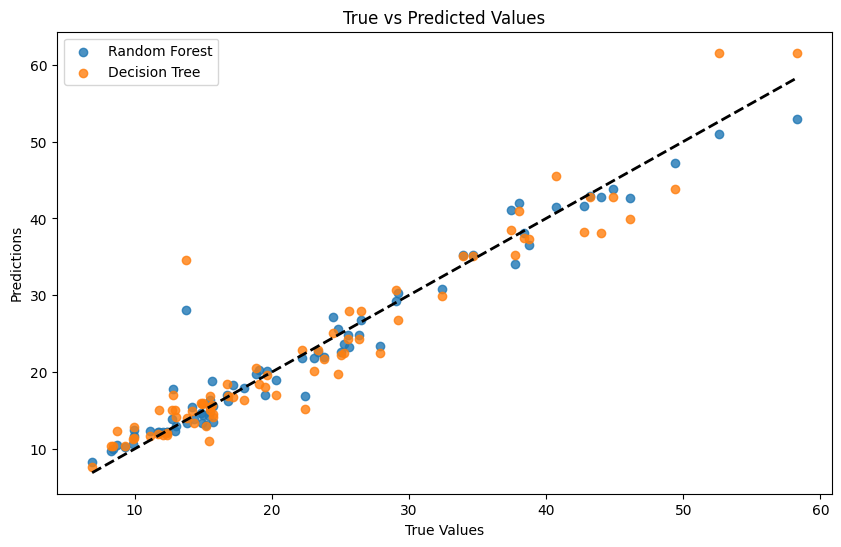

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred, alpha=0.8, label='Random Forest')
plt.scatter(y_test, predictions, alpha=0.8, label='Decision Tree')

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.title('True vs Predicted Values')
plt.legend()

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.show()

In [17]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt


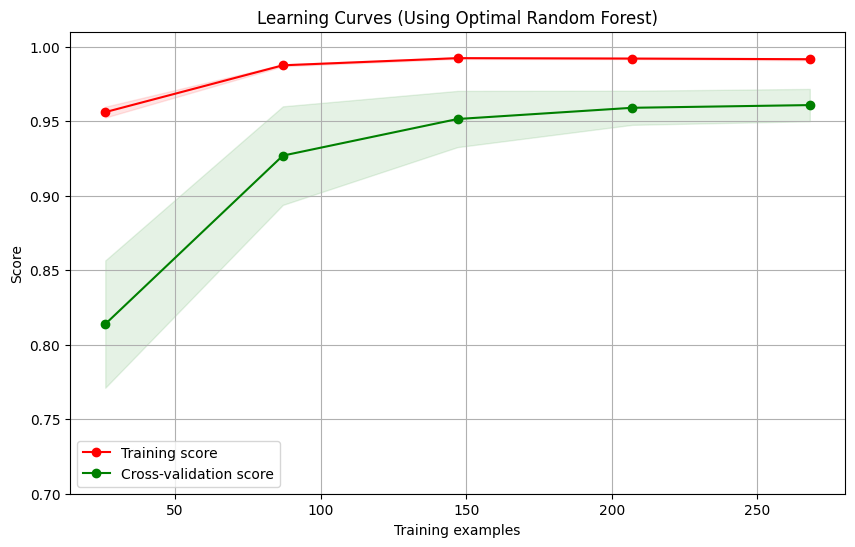

In [18]:
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Using Optimal Random Forest)"
cv = 10  # Number of folds for cross-validation
estimator = rf_optimal  # replace with your model, for example, RandomForestRegressor()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


In [19]:
# @title Creating XGBoost Model

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming X is your feature matrix and y is the target variable (oil prices)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
XGBoost_model = xgb.XGBRegressor(objective ='reg:squarederror')
XGBoost_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xg_y_pred = XGBoost_model.predict(X_valid)


# For future predictions, you can use:
#future_predictions = XGBoost_model.predict(X_future)

# Calculate and print the Mean Absolute Error of dt
mae_xg = mean_absolute_error(y_valid, xg_y_pred)
mse_xg = mean_squared_error(y_valid, xg_y_pred)
r2_xg = r2_score(y_valid, xg_y_pred)
print(f'Mean Absolute Error for xg: {mae_xg}')
print(f"Mean Squared Error for xg: {mse_xg}")
print(f"R-squared for xg: {r2_xg}")

# print rf info
print(f"Mean Absolute Error for rf: {mae_rf}")
print(f"Mean Squared Error for rf: {mse_rf}")
print(f"R-squared for rf: {r2_rf}")
#print(y_pred)

# print dt info
print(f'Mean Absolute Error for dt: {mae_dt}')
print(f"Mean Squared Error for dt: {mse_dt}")
print(f"R-squared for dt: {r2_dt}")
#print(predictions)




Mean Absolute Error for xg: 1.5140623333606835
Mean Squared Error for xg: 6.072054300203856
R-squared for xg: 0.958301497105151
Mean Absolute Error for rf: 1.6207909540815262
Mean Squared Error for rf: 6.420734671801863
R-squared for rf: 0.9559070110275202
Mean Absolute Error for dt: 2.3164408519866657
Mean Squared Error for dt: 13.297593244952457
R-squared for dt: 0.9086816910710831


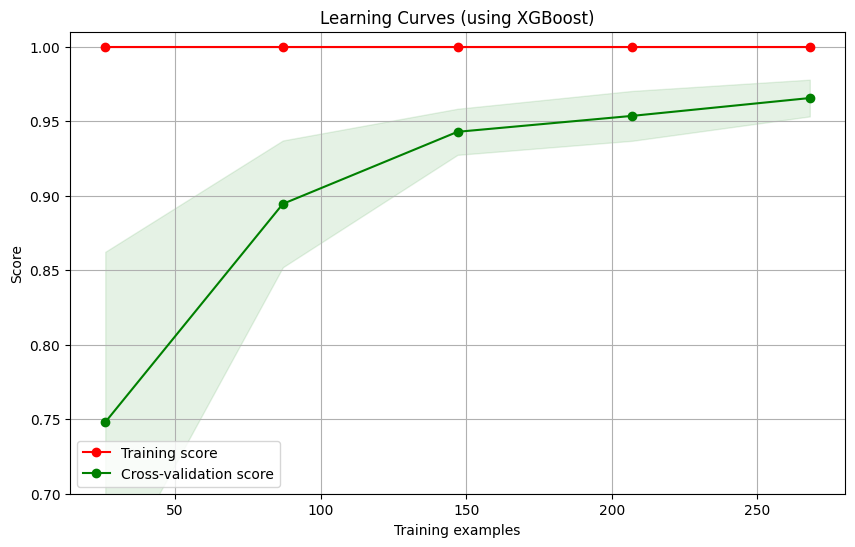

In [20]:
title = "Learning Curves (using XGBoost)"
cv = 10  # Number of folds for cross-validation
estimator = XGBoost_model  # replace with your model, for example, RandomForestRegressor()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


In [21]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Define the model with regularization
XGBoost_model_tuned = xgb.XGBRegressor(
    alpha=3, # L1 regularization term on weights (analogous to Lasso regression)
    reg_lambda=3, # L2 regularization term on weights (analogous to Ridge regression)
    max_depth=2, # Maximum depth of a tree
    random_state=42
)

# Train and evaluate
cross_val_score(XGBoost_model_tuned, X_train, y_train, cv=5)


array([0.96751401, 0.97421263, 0.96372382, 0.95166892, 0.97116999])

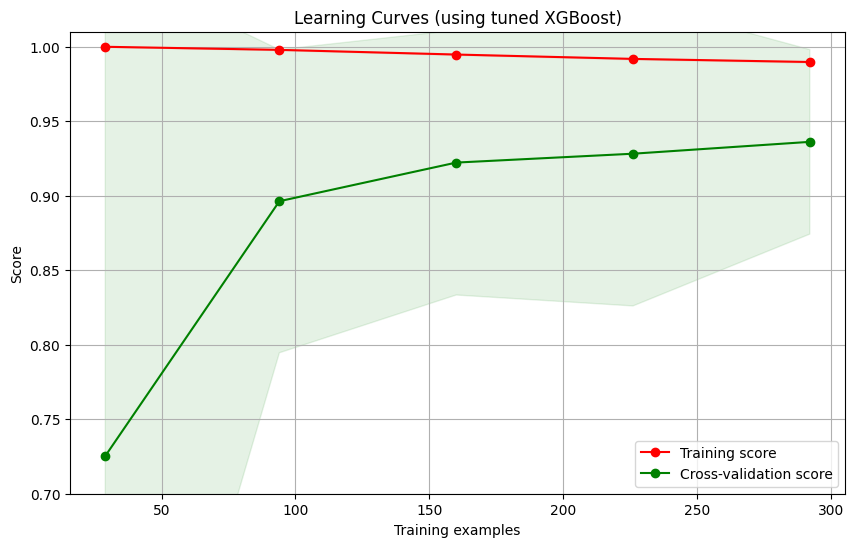

In [35]:
title = "Learning Curves (using tuned XGBoost)"
cv = 50  # Number of folds for cross-validation
estimator = XGBoost_model_tuned  # replace with your model, for example, RandomForestRegressor()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


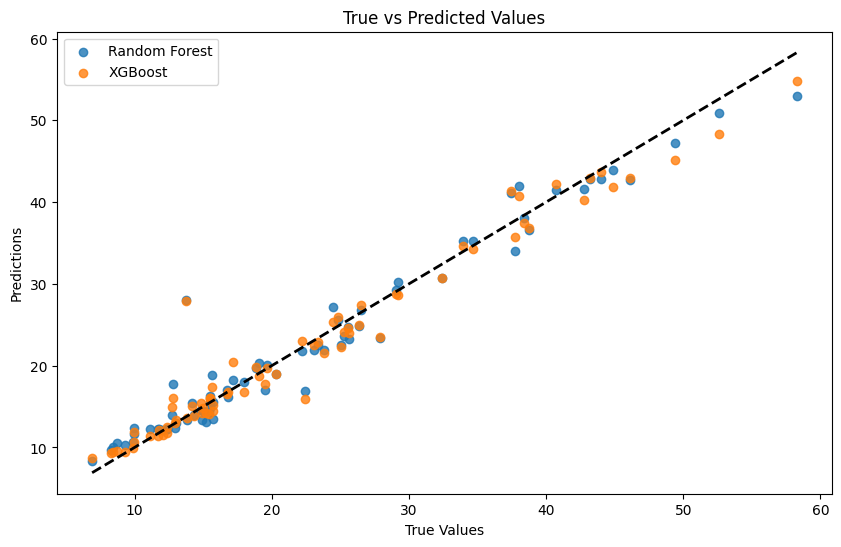

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred, alpha=0.8, label='Random Forest')
plt.scatter(y_test, xg_y_pred, alpha=0.8, label='XGBoost')

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.title('True vs Predicted Values')
plt.legend()

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.show()

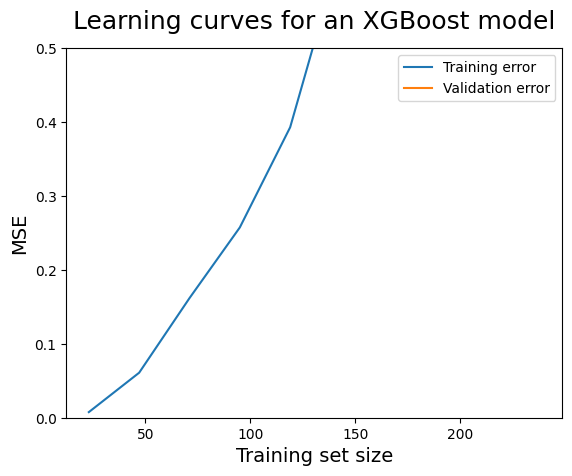

In [28]:
import xgboost as xgb
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the model with adjusted parameters
XGBoost_model_tuned  = xgb.XGBRegressor(
    alpha=0.2,
    reg_lambda=0.2,
    learning_rate=0.1,
    max_depth=2,
    random_state=42,
    n_estimators=90
)

# Fit model
XGBoost_model_tuned .fit(X_train, y_train)

# Extract learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    XGBoost_model_tuned , X_train, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, valid_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for an XGBoost model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0,.5)
plt.show()


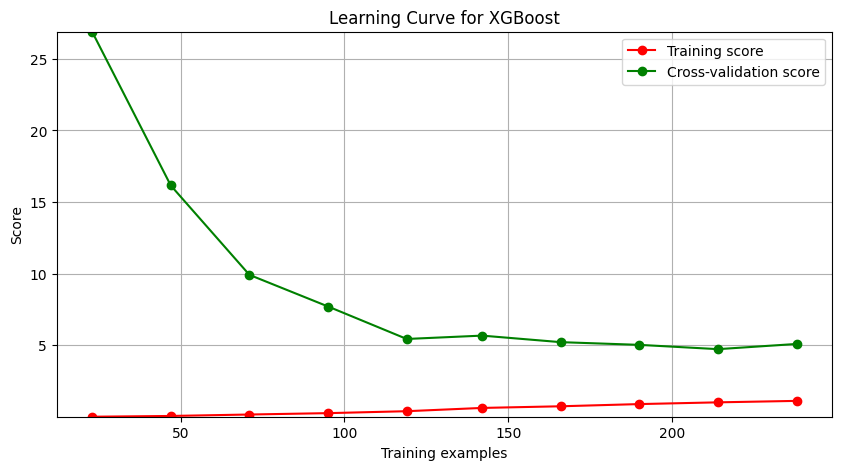

Training scores: [0.00757955 0.0608894  0.16180479 0.2574136  0.39291893 0.62133096
 0.73693478 0.89013242 1.01181411 1.11371441]
Validation scores: [26.89270343 16.15497086  9.91387548  7.70367373  5.43753959  5.67152296
  5.21472169  5.02573532  4.72580327  5.08959023]


In [25]:
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for XGBoost")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)

# Dynamically adjust y-limits
plt.ylim(min(min(train_scores_mean), min(valid_scores_mean)), max(max(train_scores_mean), max(valid_scores_mean)))

plt.show()

print("Training scores:", train_scores_mean)
print("Validation scores:", valid_scores_mean)
